Lab 6 <br/>
Jakob Persson 28h<br/>
Steffanie Kristiansson 28h<br/>
(half the time was spent waiting for the code to run .-.)

In [ ]:
# imports
import tensorflow
from __future__ import print_function
from tensorflow import keras
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd

# Hyper-parameters data-loading and formatting
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions (images structured as 28 by 28 pixels)
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshaping our data 
if K.image_data_format() == 'channels_first': # specifies which data-format-convention to follow
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)  
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# PREPROCESSING

# (normalize pixel-values from grayscale (0->255) to a range between 0.0->1.0)
# converting into 32 bit floats (most common)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 255 = maximumvalue of a byte
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices 
# (ex. digit 2 in [0 1 2 3 4 5 6 7 8 9] to [0 0 1 0 0 0 0 0 0 0])
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(125, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(lr = 0.1),
               metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
print('Nr of layers: ',len(model.layers)) # get nr of layers (if not read how many model.add), OBS input-layer is counted

print(model.summary())


11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 0.4700 - accuracy: 0.8605 - val_loss: 0.2163 - val_accuracy: 0.9378
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1932 - accuracy: 0.9424 - val_loss: 0.1581 - val_accuracy: 0.9536
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1402 - accuracy: 0.9585 - val_loss: 0.1378 - val_accuracy: 0.9566
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1094 - accuracy: 0.9672 - val_loss: 0.1062 - val_accuracy: 0.9671
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.1194 - val_accuracy: 0.9615
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0760 - accuracy: 0.9774 - val_loss: 0.0878 - val_accuracy: 0.9715
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0646 - accuracy: 0.9806 - val_loss: 0.0909 - val_accuracy: 0.9696
Epoch 

### Question 1) Auto-Encoder for denoising

check comments in the code!

### Question 2) Network model, training, and changing hyper-parameters


2a) <br/>
The network has 4 layers (5 if you conut the input layer), 1069 neurons. The first 3 dense layers have the Rectified Linear Unit activation function and the last dense layer has softmax as its activation function. 

Softmax takes a vector and converts it to a probability distribution. The documentation states that it's often used for the last layer of a classification network (our network is a classification network) because the result can be interpreted as a probability distribution. Thus, the softmax activation gives us the probability of an object having each label. 


ReLU activation is suitable since it overcomes the vanishing gradient problem, which allows the model to learn faster and perform better. 

The total number of parameters for the network is 116 285 (can also be outread from model.summary()).

2b) <br/>
The loss-function used is CategoricalCrossentropy, and the mathematical expression for it: <br/>
$$CCE(p,t) = - \sum_{c=1}^{C} t_{o,c}log(p_{o,c})$$ <br/>
You iterate over all classes $C$, with two categorical inputs $p$ for prediction and $t$ for target. And by something being categorical it means, for the MNIST dataset, that each target must tell if it belongs to any possible class. As they say in the article, an observation  basically when each target- and prediction vector is inspected and used in the compution.

(the article refered to)
https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-binary-categorical-crossentropy-with-keras.md


2c)<br/>


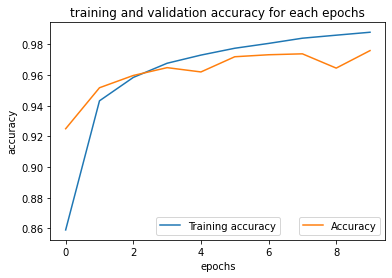

In [ ]:
train_accuracy = fit_info.history['accuracy']
val_accuracy = fit_info.history['val_accuracy']

fig, ax = plt.subplots()
train, = ax.plot(train_accuracy, label="Training accuracy", linestyle='-')
val_accuracy, = ax.plot(val_accuracy, label="Accuracy", linestyle='-')
first_legend = ax.legend(handles=[train], loc='lower center')
ax.add_artist(first_legend)
ax.legend(handles=[val_accuracy], loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('training and validation accuracy for each epochs')
plt.show()

2d)<br/>


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


regulizer =  0.001  nr  1
regulizer =  0.001  nr  2
regulizer =  0.001  nr  3
regulizer =  0.0005  nr  1
regulizer =  0.0005  nr  2
regulizer =  0.0005  nr  3
regulizer =  0.0001  nr  1
regulizer =  0.0001  nr  2
regulizer =  0.0001  nr  3
regulizer =  5e-05  nr  1
regulizer =  5e-05  nr  2
regulizer =  5e-05  nr  3
regulizer =  1e-06  nr  1
regulizer =  1e-06  nr  2
regulizer =  1e-06  nr  3


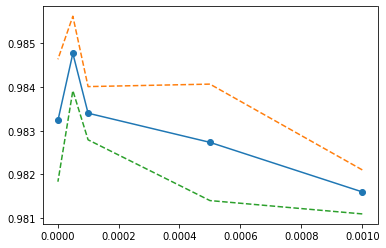

In [ ]:
from copy import deepcopy as dp

from keras.regularizers import l2
import math
import matplotlib.pyplot as plt
import numpy as np


def trainModel(epochs, regularizer):
  model = Sequential()

  model.add(Flatten())
  model.add(Dense(500, activation = 'relu', activity_regularizer=l2(regularizer))) # hidden-layer
  model.add(Dense(300, activation = 'relu', activity_regularizer=l2(regularizer))) # hidden-layer
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(lr = 0.1),
               metrics=['accuracy'])

  fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  return score[1]

acc = []

def run():
# to get everything in the right order in the array
  for i in range(3):
    acc.append(trainModel(40,0.001))
    print("regulizer = ", 0.001," nr ",i+1)
  for i in range(3):
    acc.append(trainModel(40,0.0005))
    print("regulizer = ", 0.0005," nr ",i+1)
  for i in range(3):
    acc.append(trainModel(40,0.0001))
    print("regulizer = ", 0.0001," nr ",i+1)
  for i in range(3):
    acc.append(trainModel(40,0.00005))
    print("regulizer = ", 0.00005," nr ",i+1)
  for i in range(3):
    acc.append(trainModel(40,0.000001))
    print("regulizer = ", 0.000001," nr ",i+1)
  return acc

run()

# y1 and y2 in the plot = average accuracy +/- a standard deviation 

def getDeviation(acc):
  first = acc.pop()
  second = acc.pop()
  third = acc.pop()

  average = (first + second + third)/3
  deviation = math.sqrt((math.pow(first-average, 2) + math.pow(second-average, 2) + math.pow(third-average, 2))/2)
  return deviation

# copy of accuracy to future useage
copyofAcc = dp(acc)

# regularization factors
x = [0.001,0.0005,0.0001,0.00005,0.000001] 

deviations = []
for i in range(5):
  deviations.append(getDeviation(acc))

#reverse order of deviations
reverseDev = []
for i in range(5,0,-1):
  reverseDev.append(deviations.pop())

# get the average accuracy values in an array for plotting
copyAvg = []
for i in range(5):
  first = copyofAcc.pop()
  second = copyofAcc.pop()
  third = copyofAcc.pop()

  copyAvg.append((first + second + third)/3)

# upper and lower values of accuracy (with deviation) in arrays
y1 = []
y2 = []
for i in range(len(reverseDev)):
  y1.append(copyAvg[i]+reverseDev[i])
  y2.append(copyAvg[i]-reverseDev[i])

# plotting
plt.plot(x, copyAvg, marker='o', linestyle='-', label='Accuracy')
plt.plot(x, y1, linestyle='--', label='Upper limit')
plt.plot(x, y2, linestyle='--', label='Lower limit')

plt.show()

Answer of last part in 2d) <br/>

Our best value of the accuracy was 

Looking at the plot, we do get decently close to Hintons result, but do not quite reach it. It is possible that more epochs or a lower regularization factor could bump the accuracy up to Hintons level. In the text at http://yann.lecun.com/exdb/mnist/, which we assume is what the hint references to, there is no mention of number of epochs or regularization factors. Since the hint told us to think about what wasn't mentioned, our conclusion is that if we give the algorithm a lower regularization factor and more epochs we will get closer to Hintons result. 

### Question 3) Convolutional layers


3a)   <br/>


In [ ]:
from keras import layers
from keras.regularizers import l2
import math
import matplotlib.pyplot as plt
import numpy as np

num_classes = 10
batch_size = 128
epochs = 15
regularizer = 0.00001


model3 = keras.Sequential(
      [
       keras.Input(shape=input_shape),
       layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
       #layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
       #layers.MaxPooling2D(pool_size=(2, 2)),
       layers.Flatten(),
       layers.Dropout(0.5),
       layers.Dense(500, activation = 'relu', activity_regularizer=l2(regularizer)),
       layers.Dense(300, activation = 'relu', activity_regularizer=l2(regularizer)),
       layers.Dense(num_classes, activation="softmax")
      ]
  )

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
  
score = model3.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/15
422/422 [==============================] - 48s 112ms/step - loss: 0.2287 - accuracy: 0.9299 - val_loss: 0.0535 - val_accuracy: 0.9865
Epoch 2/15
422/422 [==============================] - 47s 112ms/step - loss: 0.0725 - accuracy: 0.9782 - val_loss: 0.0387 - val_accuracy: 0.9890
Epoch 3/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 4/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 5/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0377 - accuracy: 0.9891 - val_loss: 0.0292 - val_accuracy: 0.9928
Epoch 6/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0323 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 46s 108ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.0259 - val_ac

Discussion on 3a and b: <br/>
Our best result, from having the same layers as before plus some convolutional layers, was 0.9909.<br/>

We also tried with two layers of maxPooling2D (out-commented) which gave the accuracy of 0.9936, and it was faster too. They point of having maxpooling2D is to help over-fitting by providing an abstracted form of the representation whilst it also reduces the computional cost (reduces nr of parameters). <br/>

According to https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5 the convolutional layers take longer to train but *are trained to identify and extract the best features*, which results in better accuracy. So if your after the best possible result you should use or include some CNN layers, but if you just want a fast and approximatley accurate accuracy fully connected NN works just fine. 

### Question 4) Auto-Encoder for denoising


current salt level: 0.2
current salt level: 0.4
current salt level: 0.6000000000000001
current salt level: 0.8
current salt level: 1.0


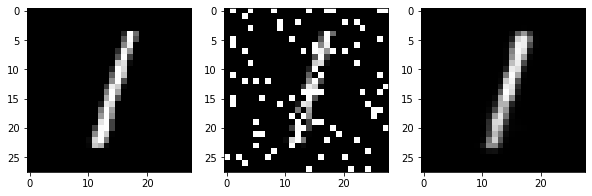

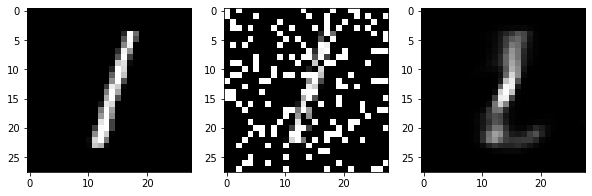

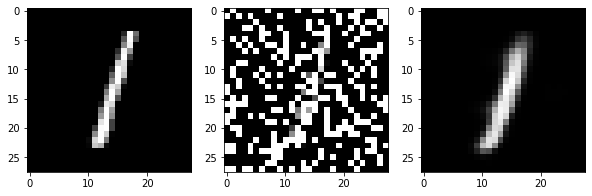

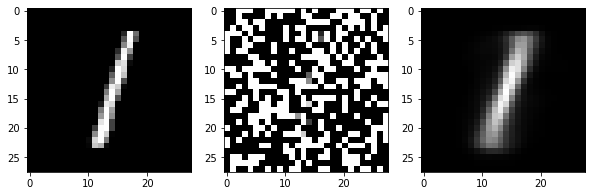

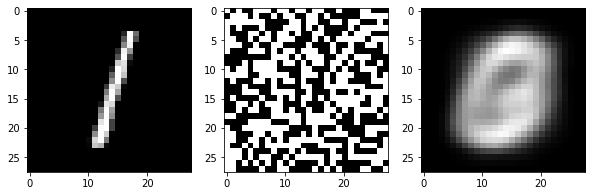

In [ ]:

import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


def run(noise):
  #data preparation
  flattened_x_train = x_train.reshape(-1,784)
  flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=noise)

  flattened_x_test = x_test.reshape(-1,784)
  flattened_x_test_seasoned = salt_and_pepper(flattened_x_test, noise_level=noise)


  latent_dim = 96  

  input_image = keras.Input(shape=(784,))
  encoded = Dense(128, activation='relu')(input_image)
  encoded = Dense(latent_dim, activation='relu')(encoded)
  decoded = Dense(128, activation='relu')(encoded)
  decoded = Dense(784, activation='sigmoid')(decoded)

  autoencoder = keras.Model(input_image, decoded)
  encoder_only = keras.Model(input_image, encoded)

  encoded_input = keras.Input(shape=(latent_dim,))
  decoder_layer = Sequential(autoencoder.layers[-2:])
  decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

  autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                    epochs=32,
                    batch_size=64,
                    shuffle=True,
                    verbose=0,
                    validation_data=(flattened_x_test_seasoned, flattened_x_test))

  k = 2
  fig, axs = plt.subplots(1,3,figsize=(10,15))
  sample1 = x_test[k]
  sample2 = autoencoder.predict(flattened_x_test_seasoned)
  sample3 = flattened_x_test_seasoned[k].reshape(28,28)
  axs[0].imshow(sample1.reshape(28,28), cmap = 'gray')
  axs[2].imshow(sample2[k].reshape(28,28), cmap = 'gray')
  axs[1].imshow(sample3, cmap = 'gray')

# quick little loop to generate examples with different noise levels
n = 0
while n < 1:
  n += 0.2
  print("current salt level:", n)
  run(n)


4a) <br/>
In the data-preparation it first flattens the image to a 1-D vector of 784 features (28*28). In the next step, "seasoned" train and test sets are created, in other words duplicates of "unseasoned" x_train and x_test are created and then seasoned with noise. Then the needed layers are added to the model, that means an input layer, layers for encoding and finally layers for decoding, and also an output layer. Finally the model is validated with the seasoned and unseasoned x_test sets to see how well the denoising went. 

Number of nodes is given by latent_dim. 

The role of the loss function is finding the distance between current and expected output. So i.e. a machine learns through a loss function.

4b) <br/>
For us humans, when the noise level grew larger and started approaching 0.6 it became hard/unreliable to determine the correct number. Towards noise=0.8 and higher the denoising, most numbers turned into other numbers, as an example, the number 4 started to appear like a 9. This also depends on the digit chosen, if the shape is more complex than the shape of a 1, that was chosen in this example it is likely that the noise level where it becomes impossible to determine the correct number for a human decreases. 


[0.9430000185966492, 0.9196000099182129, 0.7315000295639038, 0.31360000371932983, 0.09510000050067902]
[0.8079000115394592, 0.38760000467300415, 0.149399995803833, 0.11020000278949738, 0.09560000151395798]


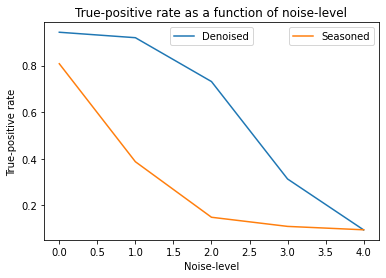

In [ ]:
# For question 4c

def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c

#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                    epochs=32,
                    batch_size=64,
                    shuffle=True,
                    verbose=0,
                    validation_data=(flattened_x_test_seasoneed, flattened_x_test))


scores_denoise = []
scores = []
i = 0
# Looping through all the different noises choosen (0.2, 0.4, 0.6, 0.8, 1.0)
while i < 1:
  i += 0.2
  
  # reshaping and etc to handle the values
  flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test,i)
  seasoned_test = autoencoder.predict(flattened_x_test_seasoneed)
  seasoned_test_reshaped = seasoned_test.reshape(len(seasoned_test), 28, 28, 1)
  seasoned_test_score = model3.evaluate(seasoned_test_reshaped, y_test, verbose=0)

  x_test_reshaped = flattened_x_test_seasoneed.reshape(len(flattened_x_test_seasoneed), 28, 28, 1)
  x_test_score = model3.evaluate(x_test_reshaped, y_test, verbose=0)

  scores_denoise.append(seasoned_test_score[1])
  scores.append(x_test_score[1])

  
# printing the array of all the noise-values for denoised/seasoned
print(scores_denoise)
print(scores)

# plotting the results 
fig, ax = plt.subplots()
denoise, = ax.plot(scores_denoise, label="Denoised", linestyle='-')
seasoned, = ax.plot(scores, label="Seasoned", linestyle='-')
first_legend = ax.legend(handles=[denoise], loc='upper center')
ax.add_artist(first_legend)
ax.legend(handles=[seasoned], loc='upper right')
plt.ylabel('True-positive rate')
plt.xlabel('Noise-level')
plt.title('True-positive rate as a function of noise-level')
plt.show()


4c) <br/>
The yellow graph shows the true-positive rate for images which are passed directly to the model for evaluation, and the blue graph shows the true-positive rate for images on which the autoencoder is used. There is a significant difference in the true-positive rates between the two, which suggests that an autoencoder like the one used in this assignment is a strong/useful tool that can be used to increase the accuracy of not the model directly, but the result of the model. An interesting aspect shown by the graphs is that the true-positive rates end up at the same value, which suggests that there is a breakpoint where the numbers become impossible to classify correctly even when denoising them first. 

4d) <br/>
If we add noise to an image with the salt and pepper method, or any other method to add noise, and then pass it through the autoencoder, the resulting image will be ever-so-slightly different from the original. This means that the autoencoder has generated its own synthetic handwritten digit. Since the algorithms used are not deterministic each output will be different. Examples of this is shown in part 4b of the assignment where the result at varying noise levels are different to one another. It should also be noted that it is the decoder that uncompresses the original image and therefore generates the final result. Furthermore, even if the digit passed through the autoencoder with some added noise is perfect originally, the decoder will always add artifacts to the final result. 